In [48]:
# house_price_kaggle.ipynb

In [49]:
# 1. 匯入訓練資料及測試資料
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [50]:
test_df = pd.read_csv("test.csv", encoding="utf-8")
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [51]:
# 2. 合併資料並刪除ID和目標欄位
datas = pd.concat([train_df, test_df], axis=0)
datas = datas.drop(["Id", "SalePrice"], axis=1)
datas

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [52]:
# 3. 數據預處理
import matplotlib .pyplot as plt
%matplotlib inline
import seaborn as sns

<ipython-input-53-cc11c50f0484>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


<Axes: xlabel='SalePrice', ylabel='Density'>

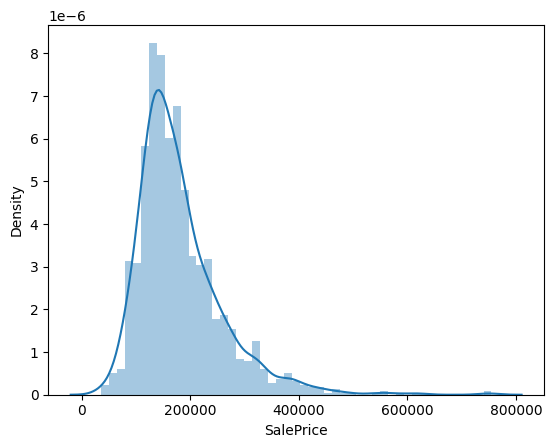

In [53]:
# 繪製訓練集目標變量的分佈圖
y_train = train_df["SalePrice"]
sns.distplot(y_train)

In [54]:
from scipy.stats import skew
# 找出最好的浪打多少
from scipy.stats import boxcox_normmax
import numpy as np
print("原本偏度:", skew(y_train))
print("最好的lambda:", boxcox_normmax(y_train+1)) #boxcox1p+1 避掉0-1
# 發現趨近於0，使用log1p

原本偏度: 1.880940746034036
最好的lambda: -0.054537901823886


In [55]:
# 填補缺失值，對於缺失值較多的特徵（缺失值數量大於1000），直接刪除。

In [56]:
# 合併表格，並重置索引
train_df_drop = train_df.drop(["SalePrice"], axis=1)
datas = pd.concat([train_df_drop, test_df], axis=0)
datas = datas.drop(["Id"], axis=1).reset_index(drop=True)
datas

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [57]:
na = datas.isna().sum()
na[na > 0].sort_values(ascending=False)
# 刪除大量缺失值
idx = na[na > 1000].index
datas = datas.drop(idx, axis=1)
datas

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [58]:
# 獲取數據集中每列的數據類型
# 檢查數值型特徵的歪斜度，對歪斜度大於1的特徵進行log1p轉換，以使其更加接近常態分佈
dt = datas.dtypes
num_idx = dt[dt != "object"].drop(["MSSubClass"]).index
# 對數值類型特徵列進行偏度計算
datas_skew = datas[num_idx].apply(lambda s:skew(s.dropna()))
datas_skew.sort_values(ascending=False)

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.145323
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.929996
MasVnrArea        2.601240
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.502351
1stFlrSF          1.469604
BsmtFinSF1        1.424989
GrLivArea         1.269358
TotalBsmtSF       1.162285
BsmtUnfSF         0.919351
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.623741
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.241176
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
YrSold            0.132399
GarageCars       -0.218260
GarageYrBlt      -0.381942
YearRemodAdd     -0.451020
YearBuilt        -0.599806
dtype: float64

In [59]:
# 對偏度大於1的特徵列進行數據轉換，做數據轉換
from scipy.special import boxcox1p
def norm(s):
  return np.log1p(s)
  #lamda = boxcox_normmax(s.dropna()+1)
  #return boxcox1p(s, lamda)
saved = datas_skew[datas_skew > 1].index
datas[saved] = datas[saved].apply(norm)
datas_skew = datas[num_idx].apply(lambda s:skew(s.dropna()))
datas_skew.sort_values(ascending=False)

PoolArea         14.998335
3SsnPorch         8.825256
LowQualFinSF      8.557690
MiscVal           5.213984
BsmtHalfBath      3.773208
KitchenAbvGr      3.520351
ScreenPorch       2.945905
BsmtFinSF2        2.461871
EnclosedPorch     1.961081
BsmtUnfSF         0.919351
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.623741
OverallCond       0.570312
MasVnrArea        0.524008
BedroomAbvGr      0.326324
GarageArea        0.241176
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
WoodDeckSF        0.158033
YrSold            0.132399
1stFlrSF          0.064828
GrLivArea         0.013188
OpenPorchSF      -0.041797
GarageCars       -0.218260
GarageYrBlt      -0.381942
YearRemodAdd     -0.451020
LotArea          -0.504751
YearBuilt        -0.599806
BsmtFinSF1       -0.617645
LotFrontage      -0.856571
TotalBsmtSF      -4.980783
dtype: float64

In [60]:
# 4. 進一步處理PoolArea特徵，將其從數據中刪除
datas = datas.drop(["PoolArea"], axis=1)

In [61]:
# 5. 填補剩餘的缺失值，對類別型特徵進行One-Hot Encoding，以及再次對MSSubClass進行One-Hot Encoding
med = datas.median().drop(["MSSubClass"])
datas = datas.fillna(med)
datas = pd.get_dummies(datas)
datas = pd.get_dummies(datas, columns=["MSSubClass"])
datas

<ipython-input-61-839966157e15>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med = datas.median().drop(["MSSubClass"])


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,150.0,...,0,0,0,0,0,0,0,0,0,0
1,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,284.0,...,0,0,0,0,0,0,0,0,0,0
2,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,434.0,...,0,0,0,0,0,0,0,0,0,0
3,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,540.0,...,1,0,0,0,0,0,0,0,0,0
4,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,490.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,0.0,546.0,...,0,0,0,0,0,0,0,1,0,0
2915,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,0.0,294.0,...,0,0,0,0,0,0,0,1,0,0
2916,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2917,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,0.0,575.0,...,0,0,0,1,0,0,0,0,0,0


In [62]:
# 6. 使用 RobustScaler 進行數據標準化
# 有懲罰項做 Normalize
from sklearn.preprocessing import MinMaxScaler, RobustScaler
scaler = RobustScaler()
datas_norm = pd.DataFrame(scaler.fit_transform(datas),
                          columns = datas.columns)
datas_norm

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,-0.171911,-0.256995,0.5,0.0,0.631579,0.256410,1.035332,0.098337,0.0,-0.541880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.620104,0.035356,0.0,3.0,0.063158,-0.435897,0.000000,0.147667,0.0,-0.312821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.398758,0.5,0.0,0.589474,0.230769,0.998206,0.041845,0.0,-0.056410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.476586,0.023391,0.5,0.0,-1.221053,-0.589744,0.000000,-0.080663,0.0,0.124786,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.806519,0.941998,1.0,0.0,0.568421,0.179487,1.148519,0.086991,0.0,0.039316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-4.420646,-3.632648,-1.0,2.0,-0.063158,-0.589744,0.000000,-0.895983,0.0,0.135043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2915,-4.420646,-3.682880,-1.0,0.0,-0.063158,-0.589744,0.000000,-0.057401,0.0,-0.295726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2916,3.276810,1.717094,-0.5,2.0,-0.273684,0.076923,0.000000,0.181639,0.0,-0.798291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,-0.351821,0.227767,-0.5,0.0,0.400000,-0.025641,0.000000,-0.013504,0.0,0.184615,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# 7. 將數據集划分為訓練集和測試集
x_train = datas_norm.iloc[:train_df.shape[0]]
x_test = datas_norm.iloc[train_df.shape[0]:]
pid = test_df["Id"]

In [64]:
# 8. 使用Lasso、Ridge和ElasticNet等線性模型進行訓練並進行預測
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
y_train_log1p = np.log1p(y_train)

In [65]:
cv = LassoCV(cv=10, n_jobs=4)
cv.fit(x_train, y_train_log1p)
print("best alpha:", cv.alpha_)
reg = Lasso(alpha=cv.alpha_)
reg.fit(x_train, y_train_log1p)
pre = reg.predict(x_test)
pre = np.expm1(pre) # 使用log1p，反向 log1p 變換回去np.exp(x) - 1
result = pd.DataFrame({
    "Id":pid,
    "SalePrice":pre
})
result.to_csv("lasso.csv", encoding="utf-8", index=False)
result

best alpha: 0.0006450337280041079


,Id,SalePrice
0,1461,118639.908477
1,1462,150708.122650
2,1463,179469.628833
3,1464,196701.213897
4,1465,202509.184066
...,...,...
1454,2915,89030.640606
1455,2916,84354.269965
1456,2917,163019.151311
1457,2918,118927.685389


In [66]:
cv = RidgeCV(cv=10)
cv.fit(x_train, y_train_log1p)
print("best alpha:", cv.alpha_)
reg = Ridge(alpha=cv.alpha_)
reg.fit(x_train, y_train_log1p)
pre = reg.predict(x_test)
pre = np.expm1(pre)
result = pd.DataFrame({
    "Id":pid,
    "SalePrice":pre
})
result.to_csv("ridge.csv", encoding="utf-8", index=False)
result

best alpha: 10.0


,Id,SalePrice
0,1461,117178.560145
1,1462,153320.824088
2,1463,180212.040725
3,1464,193817.860995
4,1465,203297.936570
...,...,...
1454,2915,85969.446042
1455,2916,80212.864093
1456,2917,163370.322439
1457,2918,117786.116307


In [67]:
cv = ElasticNetCV(cv=10, n_jobs=4)
cv.fit(x_train, y_train_log1p)
print("best alpha:", cv.alpha_)
reg = ElasticNet(alpha=cv.alpha_)
reg.fit(x_train, y_train_log1p)
pre = reg.predict(x_test)
pre = np.expm1(pre)
result = pd.DataFrame({
    "Id":pid,
    "SalePrice":pre
})
result.to_csv("elasticNet.csv", encoding="utf-8", index=False)
result

best alpha: 0.0007382240288641628


,Id,SalePrice
0,1461,119634.132261
1,1462,151340.089544
2,1463,180263.781470
3,1464,195561.184484
4,1465,204129.170591
...,...,...
1454,2915,87576.590923
1455,2916,82685.336900
1456,2917,162600.611488
1457,2918,117813.422351
